In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Deep Learning

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Deep Learning


In [3]:
def plot_data(filenames):
  
  scores = []

  sets = ['Training', 'Test', 'Validation']
  colors = ['b', 'g', 'y']

  fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,8))
  fig.suptitle('Memorability distribution')
  
  for i in range(0,3):

    # Load data
    lines = np.loadtxt(filenames[i] + '.txt',dtype=str)
    lines = [float(line) for line in lines[:,1:]]
    print(len(lines))
    scores.extend(lines)

    # Statistics
    print('\n------- ' + sets[i] + ' -------')
    print('Memorability average: ', np.mean(lines))
    print('Memorability median: ', np.median(lines))
    print('Minimum value: ', np.min(lines))
    print('Maximum value: ', np.max(lines))

    # Histogram
    axes[0].hist(lines, bins=120, color=colors[i], label=sets[i])
    axes[0].set_title('Histogram')
    axes[0].set_xlabel('Memorability score')
    axes[0].set_ylabel('Images')
    axes[0].legend()

    # Prob density
    sns.kdeplot(scores, ax=axes[1], fill=True, color=colors[i], label=sets[i])
    axes[1].set_title('Probability density')
    axes[1].set_xlabel('Memorability score')
    axes[1].legend()
    
  plt.savefig('/content/drive/MyDrive/Deep Learning/ImageMemorability/plots/Distribution')

  # Boxplot
  fig, axes = plt.subplots(1, sharex=True, figsize=(10,5))
  axes.set_title('Boxplot')
  sns.boxplot(x=scores, ax=axes)
  axes.set_xlabel('Memorability score')
  plt.savefig('/content/drive/MyDrive/Deep Learning/ImageMemorability/plots/Boxplot')

45000

------- Training -------
Memorability average:  0.7565186079333333
Memorability median:  0.771429
Minimum value:  0.2
Maximum value:  1.0
10000

------- Test -------
Memorability average:  0.7542608426
Memorability median:  0.767442
Minimum value:  0.228571
Maximum value:  1.0
3741

------- Validation -------
Memorability average:  0.7556192806736167
Memorability median:  0.767442
Minimum value:  0.257143
Maximum value:  1.0


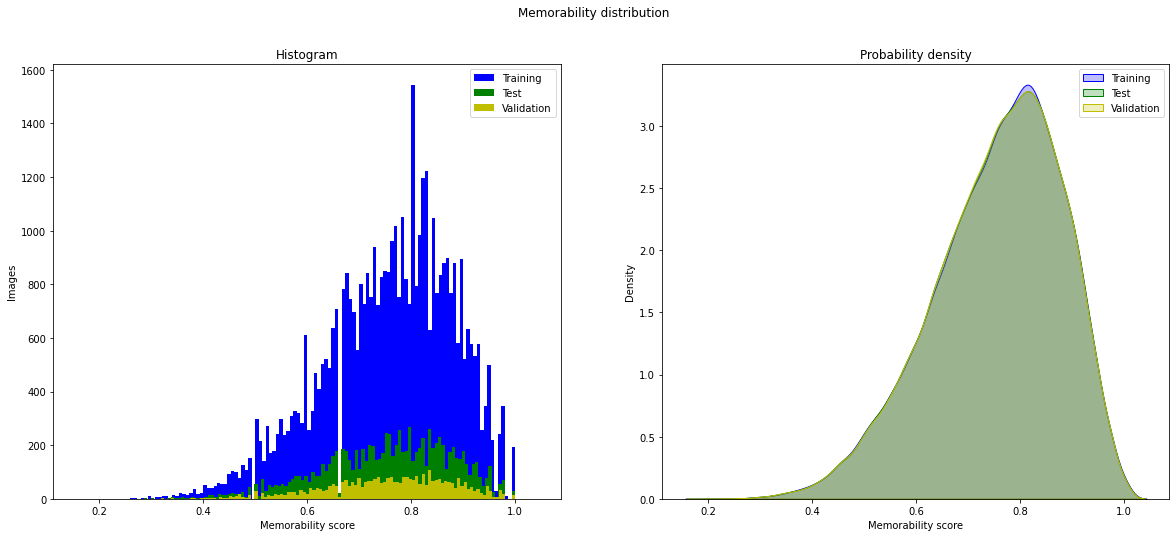

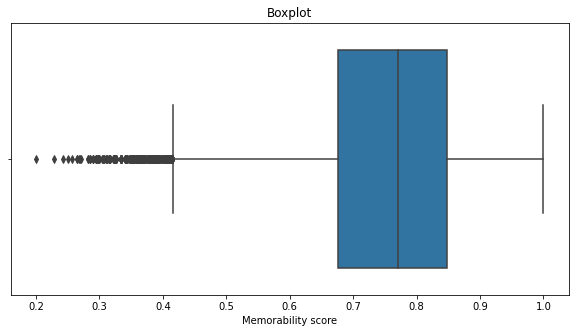

In [4]:
filenames = ['train_1', 'test_1', 'val_1']
plot_data(filenames)